# Instalando Bibliotecas


In [3]:
# Importando bibliotecas
import pandas as pd
import string
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('rslp')
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import cosine
import numpy as np
import networkx as nx
!pip install plotly.express
from plotly import graph_objs as go

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


# Exemplo de Remoção de Stopwords

In [4]:
# remoção de pontuacao e stopwords

def remove_stopwords(text,lang,domain_stopwords=[]):

  stop_words = nltk.corpus.stopwords.words(lang) # lang='portuguese' or lang='english'

  s = str(text).lower() # tudo para caixa baixa
  table = str.maketrans({key: None for key in string.punctuation})
  s = s.translate(table) # remove pontuacao
  tokens = word_tokenize(s) #obtem tokens
  v = [i for i in tokens if not i in stop_words and not i in domain_stopwords and not i.isdigit()] # remove stopwords
  s = ""
  for token in v:
    s += token+" "
  return s.strip()


# exemplos de uso
text = "O estudante de Inteligência Artificial foi na livraria comprar  livros para estudar."
text2 = remove_stopwords(text, 'portuguese')
print('Antes: '+text)
print('Depois: '+text2)

Antes: O estudante de Inteligência Artificial foi na livraria comprar  livros para estudar.
Depois: estudante inteligência artificial livraria comprar livros estudar


# Exemplo de Stemming/Radicalização de Termos

In [5]:
# stemming
def stemming(text,lang):

  stemmer = PorterStemmer() # stemming para ingles

  if lang=='portuguese':
    stemmer = nltk.stem.RSLPStemmer() # stemming para portuguese

  tokens = word_tokenize(text) #obtem tokens

  sentence_stem = ''
  doc_text_stems = [stemmer.stem(i) for i in tokens]
  for stem in doc_text_stems:
    sentence_stem += stem+" "

  return sentence_stem.strip()


# exemplos de uso
text = "O estudante de Inteligência Artificial foi na livraria comprar livros para estudar."
text2 = remove_stopwords(text, 'portuguese')
text3 = stemming(text2, 'portuguese')
print('Antes: '+text)
print('Depois: '+text3)

Antes: O estudante de Inteligência Artificial foi na livraria comprar livros para estudar.
Depois: estud intelig artific livr compr livr estud


# Coletando uma Base de Textos para Testar

In [8]:
import urllib.parse
# obtendo dataset com uma amostra de textos

query = "febre amarela" # query para consultar
query = urllib.parse.quote(query)

url = 'http://websensors.net.br/minicurso/2019/eventos-br-2017.php?q='+query
url

'http://websensors.net.br/minicurso/2019/eventos-br-2017.php?q=febre%20amarela'

In [9]:
!wget '{url}' -O dados.csv

--2024-11-20 14:57:42--  http://websensors.net.br/minicurso/2019/eventos-br-2017.php?q=febre%20amarela
Resolving websensors.net.br (websensors.net.br)... 129.121.3.177
Connecting to websensors.net.br (websensors.net.br)|129.121.3.177|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘dados.csv’

dados.csv               [       <=>          ]   2.84M  1.92MB/s    in 1.5s    

2024-11-20 14:57:44 (1.92 MB/s) - ‘dados.csv’ saved [2979374]



In [10]:
dataset = pd.read_csv('dados.csv',sep='\t')
dataset

,event_id,date,title,local,url,lat,lng
0,b4b29e9b5537c1896129029bd976438c,2017-01-05 15:27:28,"Após 2ª morte por febre amarela em SP, vacinaç...",Ribeirao Preto (SP),http://g1.globo.com/sp/ribeirao-preto-franca/n...,-21.17,-47.81
1,125bf6fbeef15b17a1d4837127129bbe,2017-01-08 16:04:51,Casos de febre amarela em macacos na região pr...,Ribeirao Preto (SP),http://g1.globo.com/sao-paulo/sao-jose-do-rio-...,-21.17,-47.81
2,aff14d48f09878b31e0575971fc8fec2,2017-01-08 14:04:51,G1 - Casos de febre amarela em macacos na regi...,Sao Jose do Rio Preto (SP),http://g1.globo.com/sao-paulo/sao-jose-do-rio-...,-20.82,-49.37
3,ca7ca58720fc9a2338894095ba6409f0,2017-01-05 13:27:28,"Após 2ª morte por febre amarela em SP, vacinaç...",Sao Jose do Rio Preto (SP),http://g1.globo.com/sp/ribeirao-preto-franca/n...,-20.82,-49.37
4,2a6e78e1226fc9c5f1c9061febf175d1,2017-01-09 14:57:25,Mortes por febre amarela põem em alerta cidade...,Sao Jose do Rio Preto (SP),http://istoe.com.br/mortes-por-febre-amarela-p...,-20.82,-49.37
...,...,...,...,...,...,...,...
8641,061b9b603b8043696558f309ab184857,2017-12-14 15:59:34,Febre amarela já matou dez pessoas e 501 macac...,Mairipora (SP),http://www.atribuna.com.br/noticias/noticias-d...,-23.31,-46.58
8642,b3a86762a53202cc32b8773051a63b48,2017-12-11 15:15:00,Postos ainda têm vacinas contra Febre Amarela ...,Hortolandia (SP),http://liberal.com.br/cidades/hortolandia/post...,-22.85,-47.22
8643,a2aa3d517698a0c4586705b95cda38c2,2017-12-13 19:03:18,Febre amarela: veja lista de postos de vacinaç...,Embu (SP),https://g1.globo.com/sp/sao-paulo/noticia/febr...,-23.64,-46.85
8644,b6f07b1d0d4aebf8f518a1060567ceca,2017-05-10 21:45:08,Confirmado primeiro caso de febre amarela em p...,Paulo Afonso (BA),https://g1.globo.com/bahia/noticia/confirmado-...,-9.40,-38.22


In [11]:
# filtrando apenas o título
dataset = dataset[['title']]
dataset

,title
0,"Após 2ª morte por febre amarela em SP, vacinaç..."
1,Casos de febre amarela em macacos na região pr...
2,G1 - Casos de febre amarela em macacos na regi...
3,"Após 2ª morte por febre amarela em SP, vacinaç..."
4,Mortes por febre amarela põem em alerta cidade...
...,...
8641,Febre amarela já matou dez pessoas e 501 macac...
8642,Postos ainda têm vacinas contra Febre Amarela ...
8643,Febre amarela: veja lista de postos de vacinaç...
8644,Confirmado primeiro caso de febre amarela em p...


# Computando uma Bag-of-Words

In [13]:
# obtendo a bag-of-words
def compute_bag_of_words(dataset,lang,domain_stopwords=[]):

  d = []
  for index,row in dataset.iterrows():
    text = row['title'] #texto do evento
    text2 = remove_stopwords(text, lang,domain_stopwords)
    text3 = stemming(text2, lang)
    d.append(text3)

  matrix = CountVectorizer(max_features=1000)
  X = matrix.fit_transform(d)

  count_vect_df = pd.DataFrame(X.todense(), columns=matrix.get_feature_names_out())

  return count_vect_df


bow = compute_bag_of_words(dataset,'portuguese')
bow

,11ª,12º,15h00investig,1ª,1º,2ª,3ª,4ª,6ª,7ª,...,xix,yaho,zer,zon,zoo,águ,áre,áudi,óbit,únic
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8641,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8642,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8643,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Ponderação de Termos com TFIDF

In [15]:
# obtendo a VSM com TFIDF
def compute_vsm_tfidf(dataset,lang,domain_stopwords=[]):

  d = []
  for index,row in dataset.iterrows():
    text = row['title'] #texto do evento
    text2 = remove_stopwords(text, lang,domain_stopwords)
    text3 = stemming(text2, lang)
    d.append(text3)

  matrix = TfidfVectorizer()
  X = matrix.fit_transform(d)

  tfidf_vect_df = pd.DataFrame(X.todense(), columns=matrix.get_feature_names_out())

  return tfidf_vect_df


vsm = compute_vsm_tfidf(dataset,'portuguese')
vsm

,09h00tur,11ª,12º,15h00investig,15h12,16º,17º,1new,1ª,1º,...,zoonos,águ,áre,áudi,époc,índic,óbit,órg,últ,únic
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Exemplo de Agrupamento Particional

In [16]:
# preparando os dados para o k-means

X = np.array(vsm)
length = np.sqrt((X**2).sum(axis=1))[:,None]
X = X / length

Ao normalizar os vetores, podemos usar k-means com distância euclidiana. Prova:

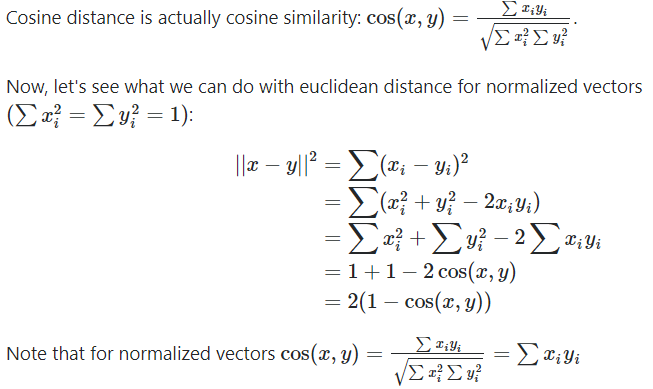

In [17]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=5).fit(X)
kmeans.labels_

df_ = vsm
df_['grupo'] = kmeans.labels_
df_

,09h00tur,11ª,12º,15h00investig,15h12,16º,17º,1new,1ª,1º,...,águ,áre,áudi,époc,índic,óbit,órg,últ,únic,grupo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
8642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [18]:
df_[['grupo']]

,grupo
0,0
1,3
2,3
3,0
4,0
...,...
8641,3
8642,1
8643,1
8644,4


array([[<Axes: title={'center': 'grupo'}>]], dtype=object)

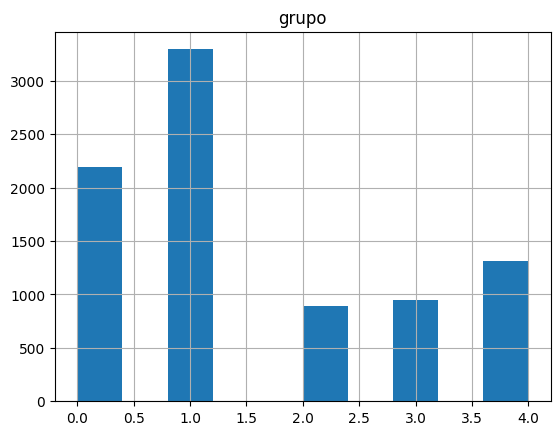

In [19]:
df_[['grupo']].hist()